# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The used car dealership wants to understand the key drivers of used car pricing to make data-informed decisions that enhance profitability and customer satisfaction. 


1. **Business Goal**:  
   - Identify which car features, conditions, and market factors significantly influence the price of used cars.  
   - Use these insights to optimize pricing strategies, inventory selection, and marketing efforts.



2. **Key Questions**:  
   - What vehicle attributes (e.g., make, model, year, mileage) most affect price?  
   - How do geographic factors (e.g., region, state) impact pricing trends?  
   - Are there specific market segments (e.g., vehicle types or conditions) with higher profitability?



3. **Data Task Definition**:  
   The task involves analyzing a dataset of 426K used cars to identify and quantify the factors affecting prices. This requires:  
   - Exploring and cleaning the data to ensure quality.  
   - Identifying patterns and relationships between features such as `year`, `odometer`, `manufacturer`, and `type` with the `price`.  
   - Developing predictive models to understand price determinants and provide actionable recommendations for the dealership.  



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data/vehicles.csv')

In [12]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
39856,7314105144,monterey bay,12500,2014.0,toyota,tacoma,NaN,4 cylinders,gas,242151.0,clean,automatic,NaN,rwd,NaN,pickup,grey,ca
118418,7314120957,tampa bay area,1900,2001.0,honda,odyssey,good,6 cylinders,gas,113228.0,clean,automatic,NaN,fwd,full-size,mini-van,white,fl
111691,7316422134,south florida,13650,2019.0,nissan,sentra,excellent,4 cylinders,gas,3878.0,clean,automatic,3N1AB7AP1KY411602,fwd,compact,sedan,silver,fl
421538,7305533839,madison,0,2010.0,ford,f-150 svt raptor,NaN,8 cylinders,gas,204923.0,clean,automatic,1FTEX1E61AFD02299,4wd,NaN,pickup,white,wi
182585,7310089623,baltimore,92000,2019.0,bmw,m850i xdrive,excellent,8 cylinders,gas,21000.0,clean,automatic,WBABC4C57KBU96515,4wd,full-size,coupe,blue,md


In [13]:
# Drop the 'id' column
df = df.drop(columns=['id'])

#### Exploratory Data Analysis (EDA)

Understanding the data

In [15]:

print("Number of rows and columns in the dataset:")
print(df.shape)

Number of rows and columns in the dataset:
(426880, 17)


In [16]:
print("Dataset summary")
print(df.info())

Dataset summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(

In [17]:
# Count missing values
print(df.isnull().sum())

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [18]:
df.nunique() # shows number of unique values in each column

region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [19]:
df.dropna(inplace=True)

print("Number of rows and columns in the dataset after removing na columns:")
print(df.shape)

Number of rows and columns in the dataset after removing na columns:
(34868, 17)


In [20]:
# Remove rows where price is less than or equal to 999
df = df[df['price'] > 999]

# Verify rows with price less than or equal to 999 are removed
print(f"Number of rows with price <= 999: {df[df['price'] <= 999].shape[0]}")

Number of rows with price <= 999: 0


In [21]:
print("Descriptive statistics for numerical variables")
df.describe()

Descriptive statistics for numerical variables


,price,year,odometer
count,31630.000000,31630.000000,3.163000e+04
mean,17456.205817,2010.850617,1.097182e+05
std,13095.837240,7.299194,8.682569e+04
min,1000.000000,1905.000000,0.000000e+00
25%,7991.000000,2008.000000,6.938775e+04
50%,13900.000000,2012.000000,1.069780e+05
75%,23900.000000,2015.000000,1.435838e+05
max,155000.000000,2022.000000,9.999999e+06


In [22]:
# Remove outlier on price

# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

df = df_no_outliers

Original DataFrame shape: (31630, 17)
DataFrame shape after removing outliers: (30633, 17)


In [23]:
# Remove outlier on odometer

# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['odometer'] >= lower_bound) & (df['odometer'] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

df = df_no_outliers

Original DataFrame shape: (30633, 17)
DataFrame shape after removing outliers: (30283, 17)


In [24]:
# Create a new column for the car's age
import datetime

# Get the current year
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
# Remove the 'year' column from the DataFrame
df = df.drop(columns=['year'])

In [25]:
print("Descriptive statistics for numerical variables after removing price and odometer outliers")
df.describe()

Descriptive statistics for numerical variables after removing price and odometer outliers


,price,odometer,age
count,30283.000000,30283.000000,30283.000000
mean,16161.959284,108443.847274,14.236767
std,10566.188907,52649.736224,7.149457
min,1000.000000,0.000000,3.000000
25%,7950.000000,71798.000000,10.000000
50%,13299.000000,107961.000000,13.000000
75%,22531.000000,143169.000000,17.000000
max,47663.000000,254061.000000,120.000000


In [26]:
print("Descriptive statistics for categorical variables")
df.describe(include=['object', 'category'])

Descriptive statistics for categorical variables


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,30283,30283,30283,30283,30283,30283,30283,30283,30283,30283,30283,30283,30283,30283
unique,390,41,4727,6,8,5,6,3,19699,3,4,13,12,51
top,vermont,ford,f-150,excellent,4 cylinders,gas,clean,automatic,3C63R3LL4JG236634,4wd,full-size,SUV,white,ca
freq,661,6375,767,16888,10447,27643,29180,28469,35,13591,17758,8296,8318,3191


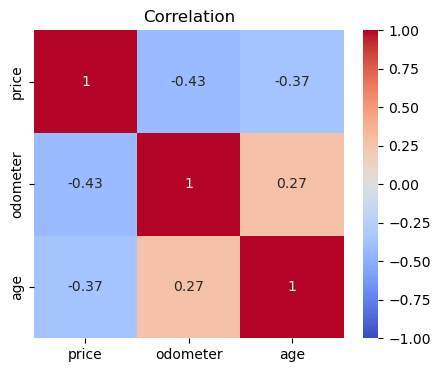

In [27]:
# Pick only the numerical features
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap using just the numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

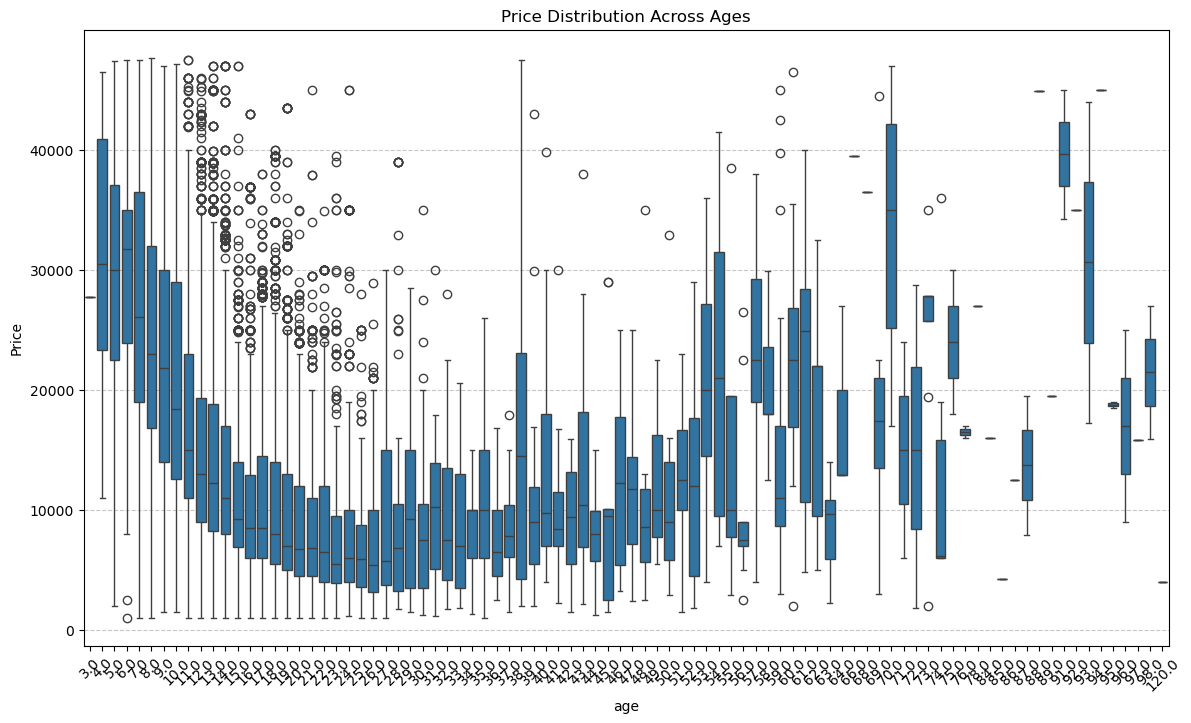

Correlation between age and Price: -0.37


In [28]:
# Relation between price and year
import seaborn as sns

# Box plot for year and price
plt.figure(figsize=(14, 8))
sns.boxplot(x='age', y='price', data=df)
plt.title("Price Distribution Across Ages")
plt.xlabel("age")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate and display correlation between age and price
correlation_age_price = df['age'].corr(df['price'])
print(f"Correlation between age and Price: {correlation_age_price:.2f}")

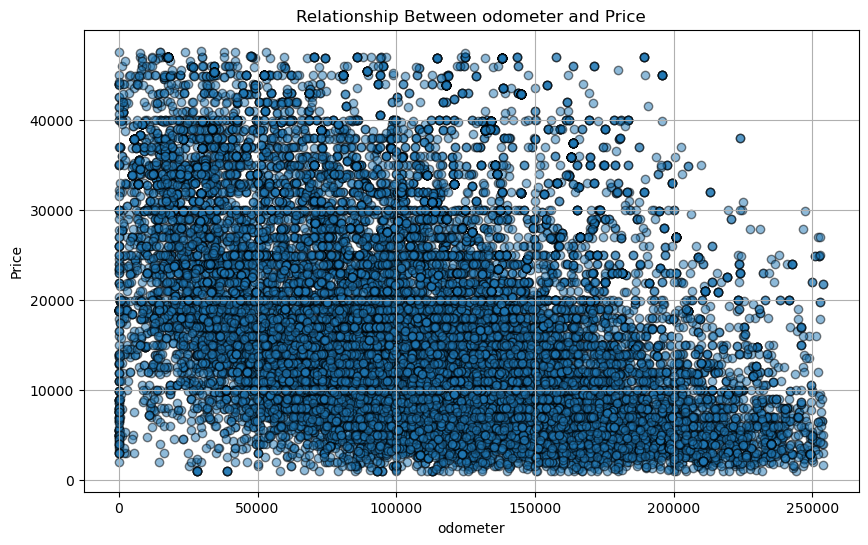

Correlation between Year and Price: -0.43


In [29]:
# Relation between price and odometer
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between year and price
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.5, edgecolor='k')
plt.title("Relationship Between odometer and Price")
plt.xlabel("odometer")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Calculate and display correlation between year and price
correlation_year_price = df['odometer'].corr(df['price'])
print(f"Correlation between Year and Price: {correlation_year_price:.2f}")

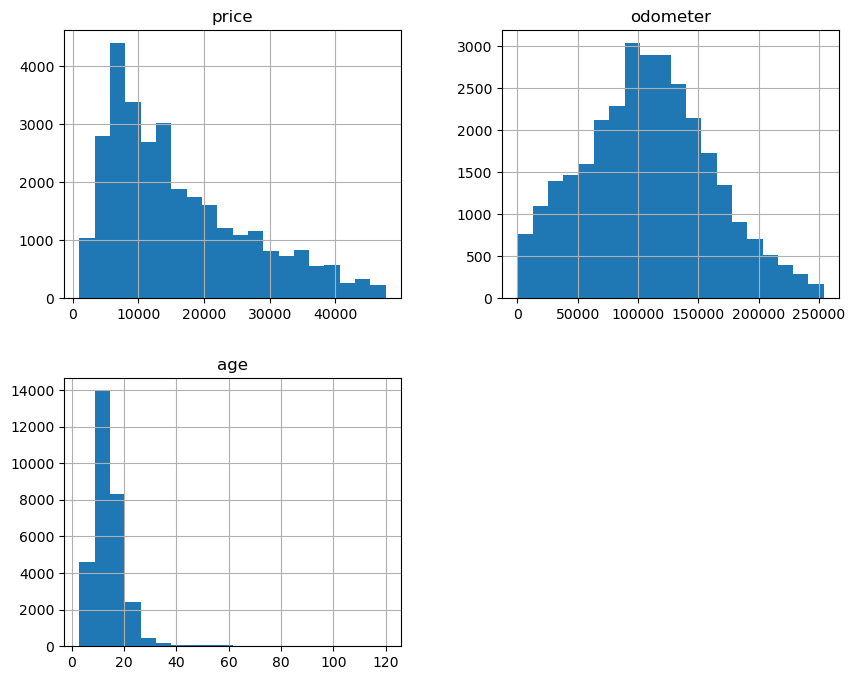

In [30]:
# Histogram/Barplots for numerical variables
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

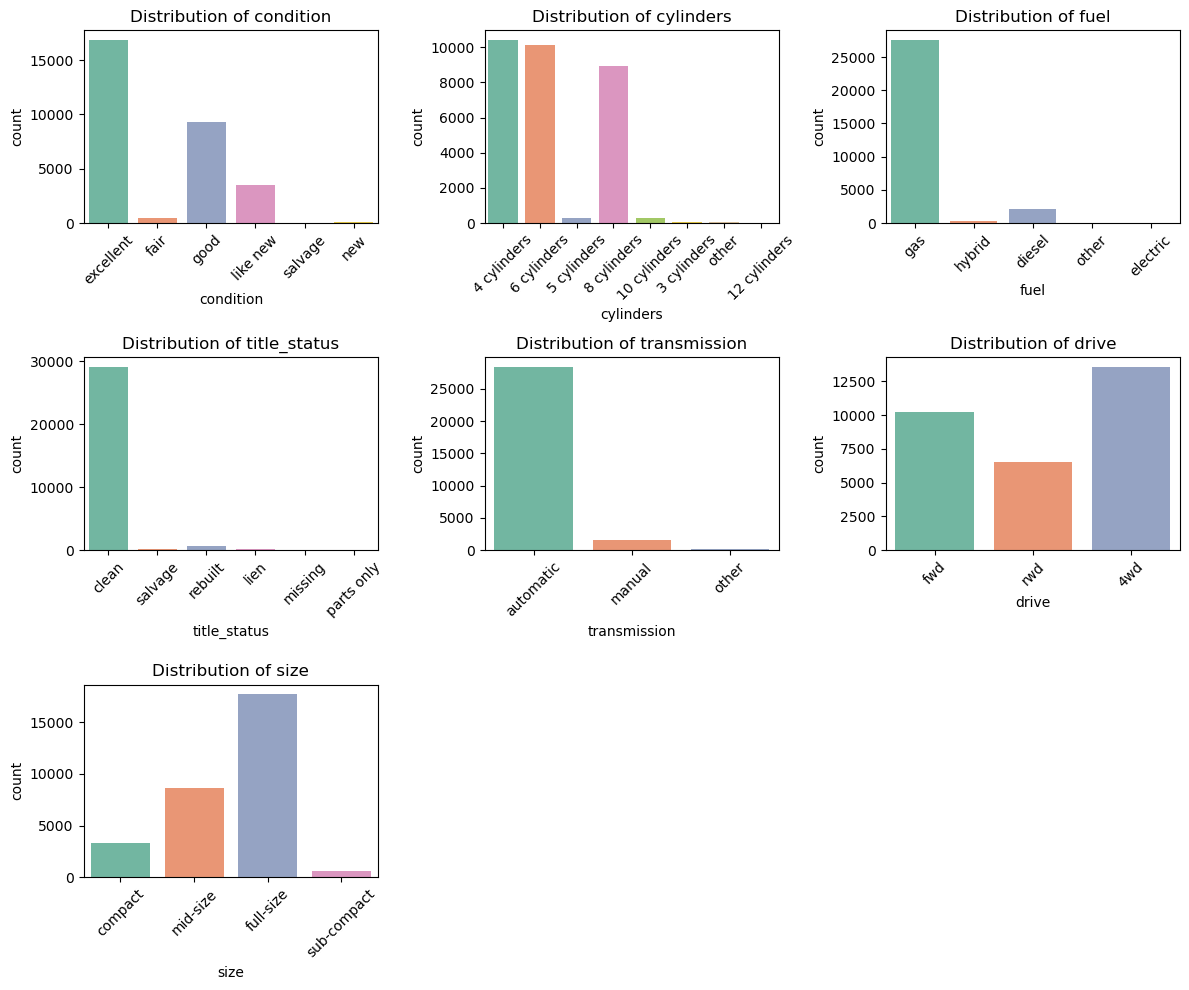

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to plot
categorical_columns = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size']

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create subplots for each categorical variable
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns for subplots
    sns.countplot(x=column, data=df, hue=column, palette='Set2', legend=False)  # Use hue=column to avoid warning
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


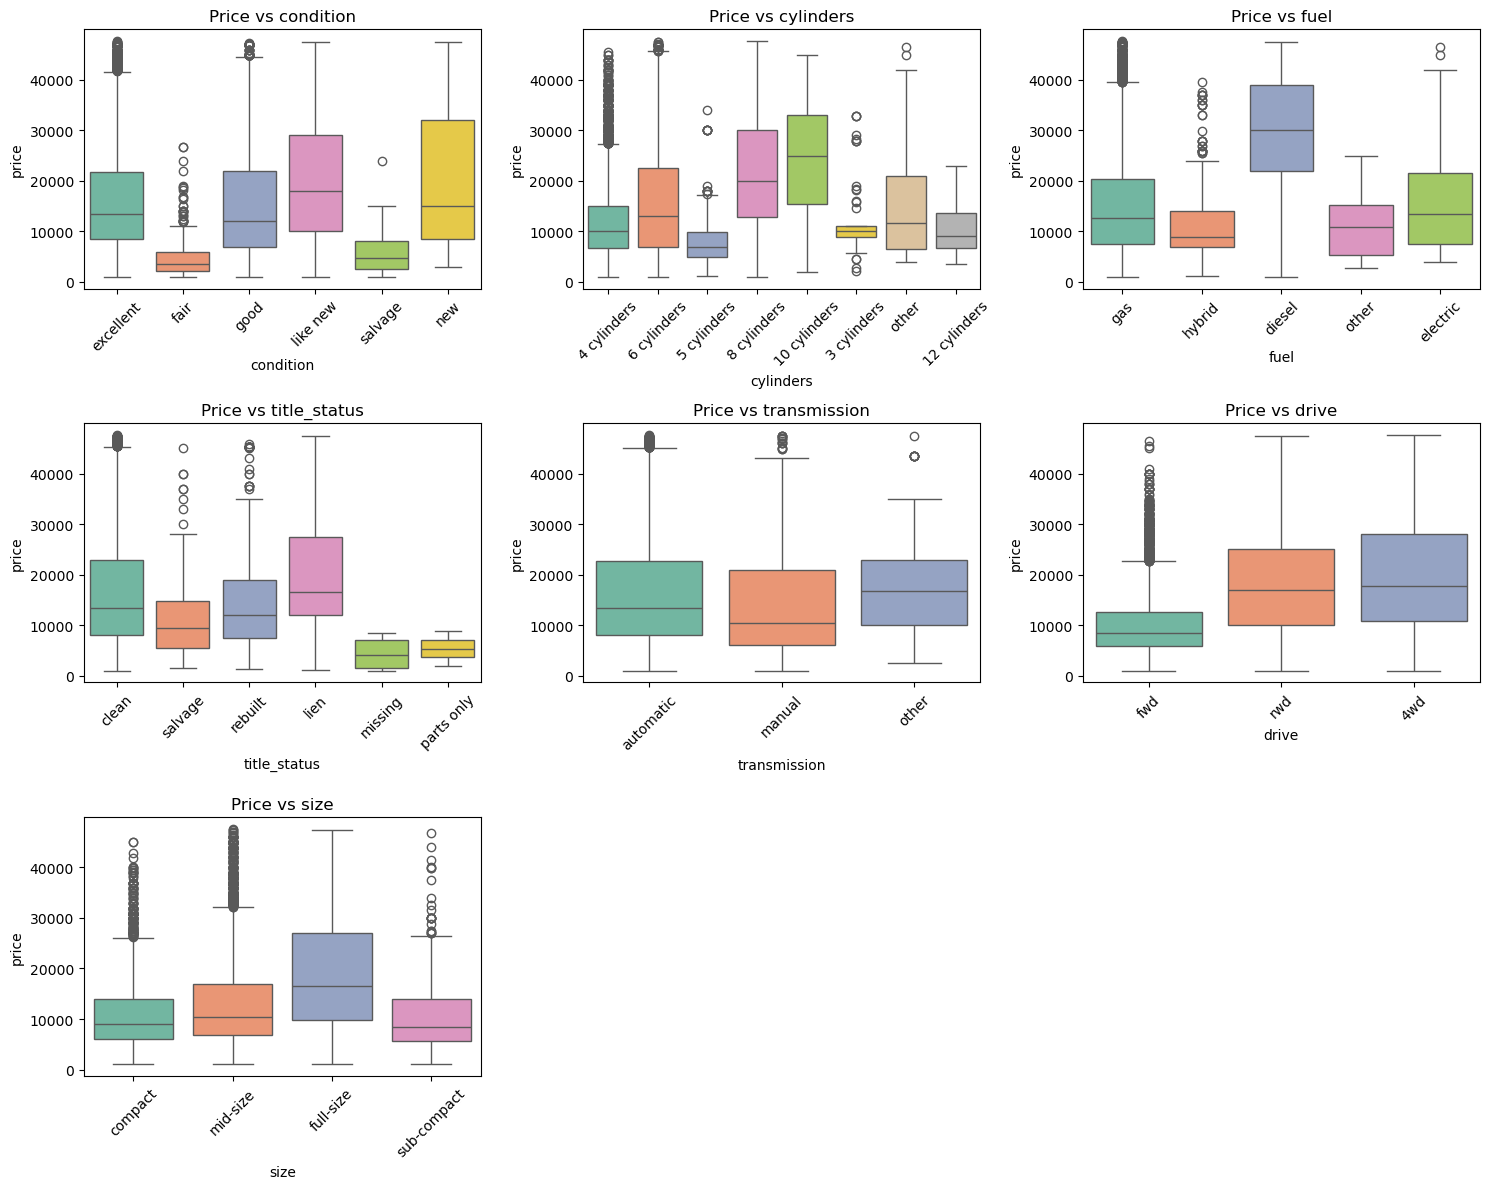

In [32]:
# Let's explore the price by categorical variable

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# List of categorical columns to explore with price
categorical_columns = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size']

# Create subplots for each categorical variable
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns for subplots
    sns.boxplot(x=column, y='price', data=df, hue=column, palette='Set2', legend=False)
    plt.title(f'Price vs {column}')
    plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [104]:

df_encoded = df.drop(['region','manufacturer','model','title_status','VIN','type','state','paint_color'], axis=1)

from sklearn.model_selection import train_test_split

# Define your features (X) and your target variable (y)
X = df_encoded.drop(columns=['price'])  # Here we get rid off the charges because it's the target variable
y = df_encoded['price']  # This is our target variable

# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,condition,cylinders,fuel,odometer,transmission,drive,size,age
265629,excellent,8 cylinders,diesel,127381.0,automatic,4wd,full-size,15.0
387519,good,4 cylinders,gas,72214.0,automatic,4wd,mid-size,8.0
237650,excellent,8 cylinders,diesel,118000.0,automatic,4wd,full-size,9.0
182031,like new,10 cylinders,gas,1567.0,automatic,rwd,full-size,22.0
95143,excellent,8 cylinders,diesel,205110.0,automatic,4wd,full-size,18.0


In [35]:
print(f"Train set size: {X_train.shape}. Number of labels in the trian set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

Train set size: (24226, 8). Number of labels in the trian set: (24226,)
Test set size: (6057, 8). Number of labels in the test set: (6057,)


In [36]:
# Define numerical and categorical features
categorical_columns = ['cylinders','drive']
numerical_columns = ['age', 'odometer']

In [108]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create a preprocessor that applies both one-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standarize numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-Hot encoding for categorical features
    ])

In [110]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [112]:

# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for the categorical columns.
name_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
name_all_columns = list(numerical_columns) + list(name_categorical_columns)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=name_all_columns)
X_train_processed_df.head()

,age,odometer,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,drive_fwd,drive_rwd
0,0.104702,0.360011,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.868899,-0.687587,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.729813,0.181870,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.078303,-2.029144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.521960,1.836053,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [114]:
X_test_processed_df = pd.DataFrame(X_test_processed, columns=name_all_columns)
X_test_processed_df.head()

,age,odometer,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,drive_fwd,drive_rwd
0,-0.868899,-0.632365,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.521960,-1.631635,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.868899,-1.263085,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.356475,1.739016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.661046,1.266214,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [117]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_processed_df, y_train)

LinearRegression()

In [119]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


y_pred = model.predict(X_test_processed_df)

In [121]:
df['price'].describe()

count    30283.000000
mean     16161.959284
std      10566.188907
min       1000.000000
25%       7950.000000
50%      13299.000000
75%      22531.000000
max      47663.000000
Name: price, dtype: float64

In [123]:
# Evaluate using MAE, MSE, RMSE, and R-squared
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"R-squared (R2): {lr_r2}")

# Cross-validation to evaluate model generalization
cv_scores = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-Validation RMSE: {cv_rmse}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 5168.439456579034
Mean Squared Error (MSE): 48454147.863052726
Root Mean Squared Error (RMSE): 6960.901368576682
R-squared (R2): 0.5721233497339623
Cross-Validation RMSE: 7077.7160301081285


In [125]:
# Coefficients
coefs = model.coef_

for name, coef in zip(name_all_columns, coefs):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

yintercept = model.intercept_
print(f"{yintercept:.2f}")

Feature: age                  Coefficient: -3389.1710
Feature: odometer             Coefficient: -4319.9818
Feature: cylinders_12 cylinders Coefficient: -2143.6362
Feature: cylinders_3 cylinders Coefficient: -12888.5527
Feature: cylinders_4 cylinders Coefficient: -10241.8847
Feature: cylinders_5 cylinders Coefficient: -9670.6899
Feature: cylinders_6 cylinders Coefficient: -6106.9752
Feature: cylinders_8 cylinders Coefficient: -563.7139
Feature: cylinders_other      Coefficient: -7053.0430
Feature: drive_fwd            Coefficient: -6436.8677
Feature: drive_rwd            Coefficient: -1995.0005
24640.25


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Reflection on Modeling and Business Objectives

With some modeling accomplished, it is important to step back and evaluate the quality of our model and the insights gained.

### Business Objective Review
Our goal is to understand the key factors that drive used car prices and provide actionable recommendations to the dealership. This requires not only building a model with acceptable predictive power but also extracting interpretable insights that align with market realities.

### Model Evaluation
- Our linear regression model explains approximately 57% of the variance in prices (R² ≈ 0.57), which indicates a moderate fit given the complexity and variability inherent in used car pricing.
- Key predictors such as **age** and **mileage** demonstrate strong, expected negative impacts on price.
- Categorical variables, including **cylinder counts** and **drive types**, offer meaningful distinctions in pricing trends.
- The model's error margins (MAE ~ $5,168, RMSE ~ $6,961) suggest reasonable but improvable accuracy.

### Insights and Business Value
- Age and mileage are confirmed as dominant factors affecting depreciation.
- Certain engine sizes (notably 3 and 4 cylinders) correspond to lower price points, reflecting consumer preferences or performance expectations.
- Front-wheel drive vehicles are generally valued lower than others, informing inventory and pricing decisions.

### Next Steps and Recommendations
- Consider revisiting earlier phases if improved accuracy is required:
  - Explore non-linear modeling approaches (e.g., Random Forest, Gradient Boosting).
  - Investigate interaction effects between features.
  - Incorporate additional relevant data if available.
- If the current model suffices for strategic insights, prepare to present findings with clear visualizations and targeted recommendations for the client.

Ultimately, the value lies in balancing predictive performance with actionable business insights, enabling the dealership to make informed decisions that align with consumer valuation trends.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Used Car Pricing Analysis Report

## Introduction

This report summarizes our analysis of factors influencing used car prices, based on a dataset of over 30,000 vehicles. Our goal is to help your dealership understand which features consumers value most so you can optimize inventory purchasing and pricing strategies.



## Key Findings

### 1. Age and Mileage Are the Biggest Price Drivers
- **Car age** strongly lowers value — each additional year reduces price by approximately **$3,400**.
- **Mileage** also negatively impacts price — higher odometer readings correlate with lower prices.
- Prioritize sourcing cars with lower mileage and newer model years to maximize resale value.

### 2. Engine Size (Cylinders) Affects Pricing
- Vehicles with **3 or 4 cylinders** tend to sell for significantly less than other engine sizes.
- This likely reflects consumer preferences for power and performance.
- Consider inventory balance — while smaller engines may appeal to fuel-efficiency buyers, they generally command lower prices.

### 3. Drive Type Influences Value
- **Front-wheel drive (FWD)** vehicles tend to have lower prices compared to other drive configurations.
- Rear-wheel and all-wheel drive cars generally maintain higher values.
- Use this insight to tailor your buying strategy depending on the market demand and price targets.


## Model Performance Summary

| Metric                  | Value   |
|-------------------------|---------|
| R-squared (R²)          | 0.57    |
| Mean Absolute Error     | $5,168  |
| Root Mean Squared Error | $6,961  |

Our model explains over half of the variability in used car prices, providing a solid basis for informed decision-making.


## Recommendations for  Dealership

- **Focus on newer, lower-mileage vehicles** to attract buyers willing to pay premium prices.
- **Evaluate engine size trends** in your local market to balance fuel efficiency and performance demands.
- **Adjust pricing strategies** for FWD vehicles accordingly, recognizing their generally lower market value.
- Consider additional market data and vehicle condition details when making purchasing decisions to further refine pricing.



## Conclusion

This analysis equips your dealership with actionable insights into what drives used car prices. Leveraging these findings will help you fine-tune inventory acquisition and pricing, improving profitability and customer satisfaction.